In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np


In [5]:
data = pd.read_csv('stcp-Rdataset-Diet.csv')

In [6]:
data.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [7]:
data.gender.unique()

array([' ', '0', '1'], dtype=object)

In [8]:
data[data.gender == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0


In [9]:
print('Missing value percentage of all data: {:.2f}%'.format(data[data.gender == ' '].size / data.size * 100))

Missing value percentage of all data: 2.56%


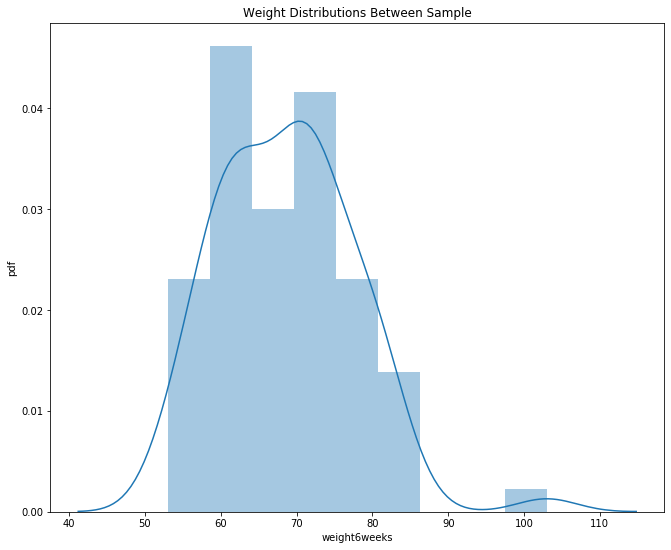

In [10]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Weight Distributions Between Sample')
plt.ylabel('pdf')
sns.distplot(data.weight6weeks)

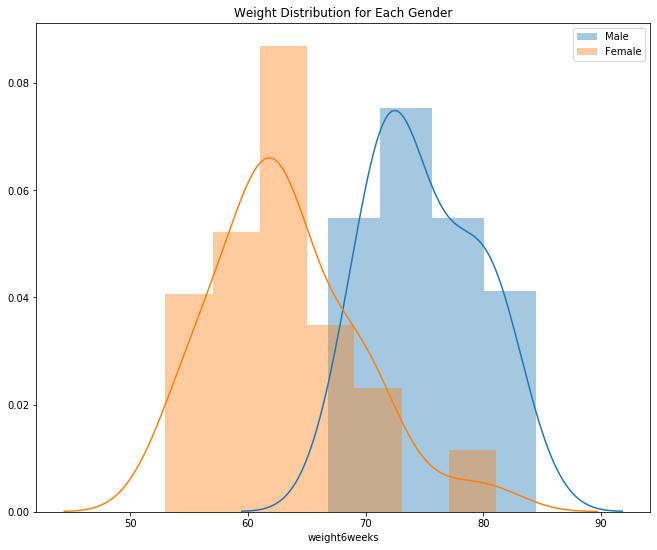

In [11]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(data[data.gender == '1'].weight6weeks, ax=ax, label='Male')
sns.distplot(data[data.gender == '0'].weight6weeks, ax=ax, label='Female')
plt.title('Weight Distribution for Each Gender')
plt.legend()

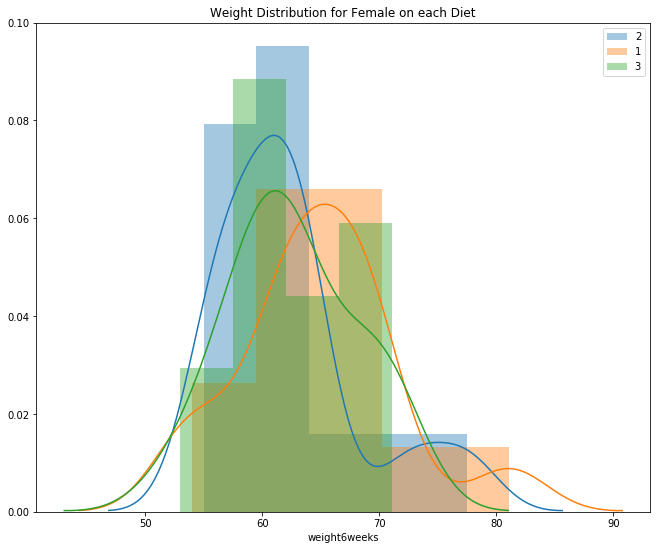

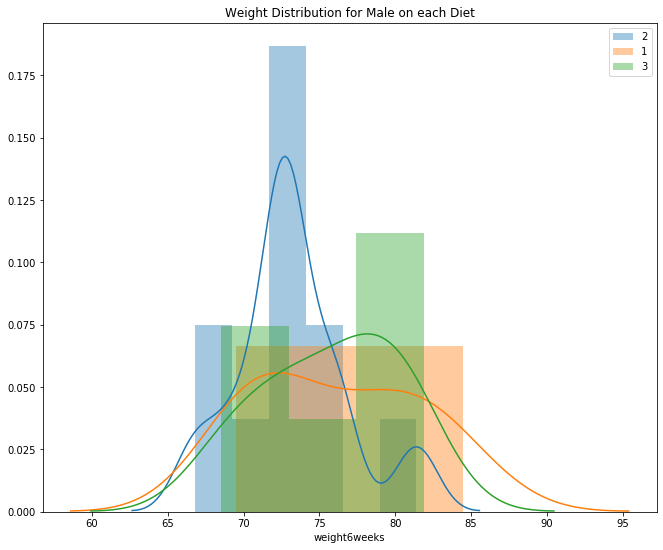

In [12]:
def infer_gender(x):
    if x == '1': 
        return 'Male'
    
    if x == '0':
        return 'Female'
    
    return 'Other'

def show_distribution(df, gender, column, group):
    f, ax = plt.subplots(figsize=(11,9))
    plt.title('Weight Distribution for {} on each {}'.format(gender, column))
    for group_member in group:
        sns.distplot(df[df[column] == group_member].weight6weeks, label='{}'.format(group_member))
    plt.legend()
    plt.show()
    
unique_diet = data.Diet.unique()
unique_gender = data.gender.unique()

for gender in unique_gender:
    if gender != ' ':
        show_distribution(data[data.gender == gender], infer_gender(gender), 'Diet', unique_diet)

In [13]:
data.groupby('gender').agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks

,mean,median,count_nonzero,std
gender,,,,
,81.500000,81.5,2.0,30.405592
0,63.223256,62.4,43.0,6.150874
1,75.015152,73.9,33.0,4.629398


In [14]:
data.groupby(['gender', 'Diet']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks


mean  median  count_nonzero        std
gender Diet                                             
       2     81.500000   81.50            2.0  30.405592
0      1     64.878571   64.50           14.0   6.877296
       2     62.178571   61.15           14.0   6.274635
       3     62.653333   61.80           15.0   5.370537
1      1     76.150000   75.75           10.0   5.439414
       2     73.163636   72.70           11.0   3.818448
       3     75.766667   76.35           12.0   4.434848

In [16]:
mod = ols('Height ~ Diet', data=data[data.gender=='0']).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Female')
print('----------------------')
print(aov_table)
print()


mod = ols('Height ~ Diet', data=data[data.gender=='1']).fit()
# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for Male')
print('----------------------')
print(aov_table)

ANOVA table for Female
----------------------
               sum_sq    df        F    PR(>F)
Diet       559.680764   1.0  7.17969  0.010566
Residual  3196.086677  41.0      NaN       NaN

ANOVA table for Male
----------------------
               sum_sq    df        F    PR(>F)
Diet        67.801603   1.0  0.43841  0.512784
Residual  4794.259003  31.0      NaN       NaN
